In [3]:
!pip install pandas numpy matplotlib scikit-learn seaborn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
np.random.seed(42)
data = pd.DataFrame({
    'temperature': np.random.normal(75, 5, 500),
    'vibration': np.random.normal(3, 1, 500),
    'speed': np.random.normal(1500, 100, 500),
    'runtime_hours': np.random.randint(100, 10000, 500)
})
# create a failure column (1 = failure, 0 = normal)
data['failure'] = ((data['temperature'] > 80) | (data['vibration'] > 4)).astype(int)

data.head()


,temperature,vibration,speed,runtime_hours,failure
0,77.483571,3.926178,1639.935544,3490,0
1,74.308678,4.909417,1592.463368,6097,1
2,78.238443,1.601432,1505.963037,6454,0
3,82.615149,3.562969,1435.306322,763,1
4,73.829233,2.349357,1569.822331,9424,0


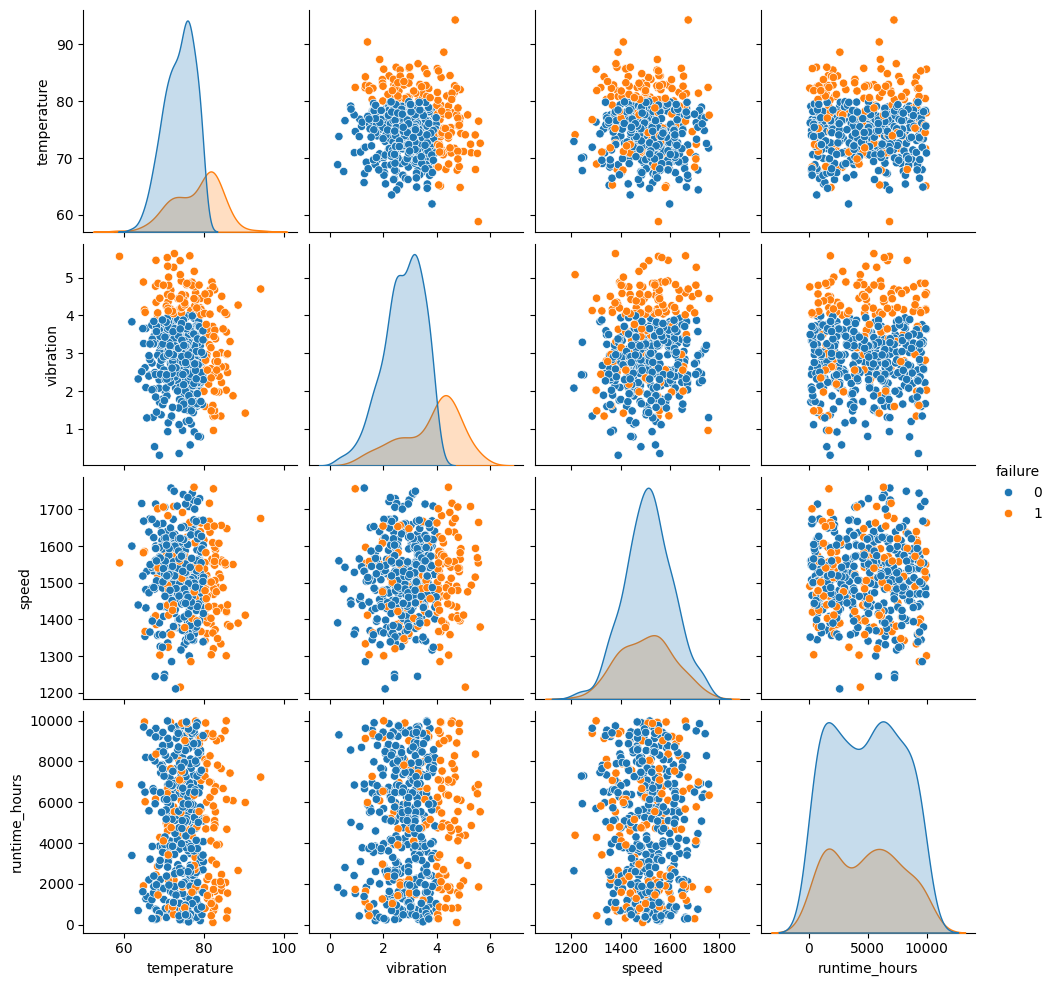

In [6]:
sns.pairplot(data, hue='failure')
plt.show()


In [7]:
X = data[['temperature', 'vibration', 'speed', 'runtime_hours']]
y = data['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[74  0]
 [ 0 26]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        26

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [9]:
new_data = pd.DataFrame({
    'temperature': [82],
    'vibration': [4.5],
    'speed': [1520],
    'runtime_hours': [5600]
})
prediction = model.predict(new_data)[0]

if prediction == 1:
    print("⚠️ Predictive Alert: Possible Equipment Failure Detected!")
else:
    print("✅ Machine Running Normally.")


⚠️ Predictive Alert: Possible Equipment Failure Detected!


In [10]:
import joblib
joblib.dump(model, 'predictive_model.pkl')


['predictive_model.pkl']

In [11]:
data.to_csv('machine_data.csv', index=False)
